# Dentate Gyrus development

In [1]:
import math
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from tivelo.main import tivelo
from baseline import run_baseline
from tivelo.plotting.velo_vec_plot import scatter_gene

(Running UniTVelo 0.2.5.2)
2025-04-05 04:58:31


2025-04-05 12:58:41.715531: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Run TIVelo
Load the dataset.

In [2]:
# load preprocessed dataset
data_name = "dentategyrus"
data_path = "/lustre/project/Stat/s1155184322/datasets/velocity/10X43_1_processed.h5ad"
adata = sc.read(data_path)

Here the data has been preprocessed by the standard pipeline of scvelo as the following:

In [ ]:
# scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
# scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

However, sometimes there will be some issues. To avoid that, we can use the following instead:

In [ ]:
# scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
# sc.pp.pca(adata)
# sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
# scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [6]:
group_key = "clusters"
emb_key = "X_umap"
cluster_edges = [("nIPC", "Neuroblast"), ("Neuroblast", "Granule immature"), ("Granule immature", "Granule mature"),
                 ('OPC', 'OL')]

Set the model parameters. 
To measure the model performance, it requires the input cluster edges to see if the velocity stream is consistent with the given direction of edges. Set measure_performance = True.

In [4]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = "Cplx2"
show_DTI = True
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 5 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


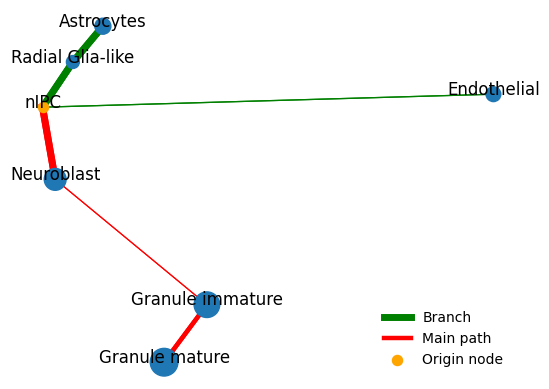


main path: ['nIPC', 'Neuroblast', 'Granule immature', 'Granule mature']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: 1.138 
median: 0.647 
lower quantile: -14.149 
upper quantile: 15.858 
minimum: -200.031 
maximum: 140.278 
No. of positive scores: 439

branch_1: ['nIPC', 'Endothelial']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.004079103469848633s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.020292043685913086s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01900029182434082s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.025172948837280273s.) 

mean: 0.000 
median: 0.000 
lower quantile: -0.000 
upper quantile: 0.000 
minimum: -0.000 
maximum: 0.000 
No. of positive scores: 220

branch_2: ['nIPC', 'Radial Glia-like', 'Astrocytes']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.00500178337097168s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.02238774299621582s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.022337675094604492s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.030083656311035156s.) S

mean: -0.000 
median: 0.000 
lower quantile: -0.000 
upper quantile: 0.000 
minimum: -0.000 
maximum: 0.000 
No. of positive scores: 227

'path_dict' added to adata.uns


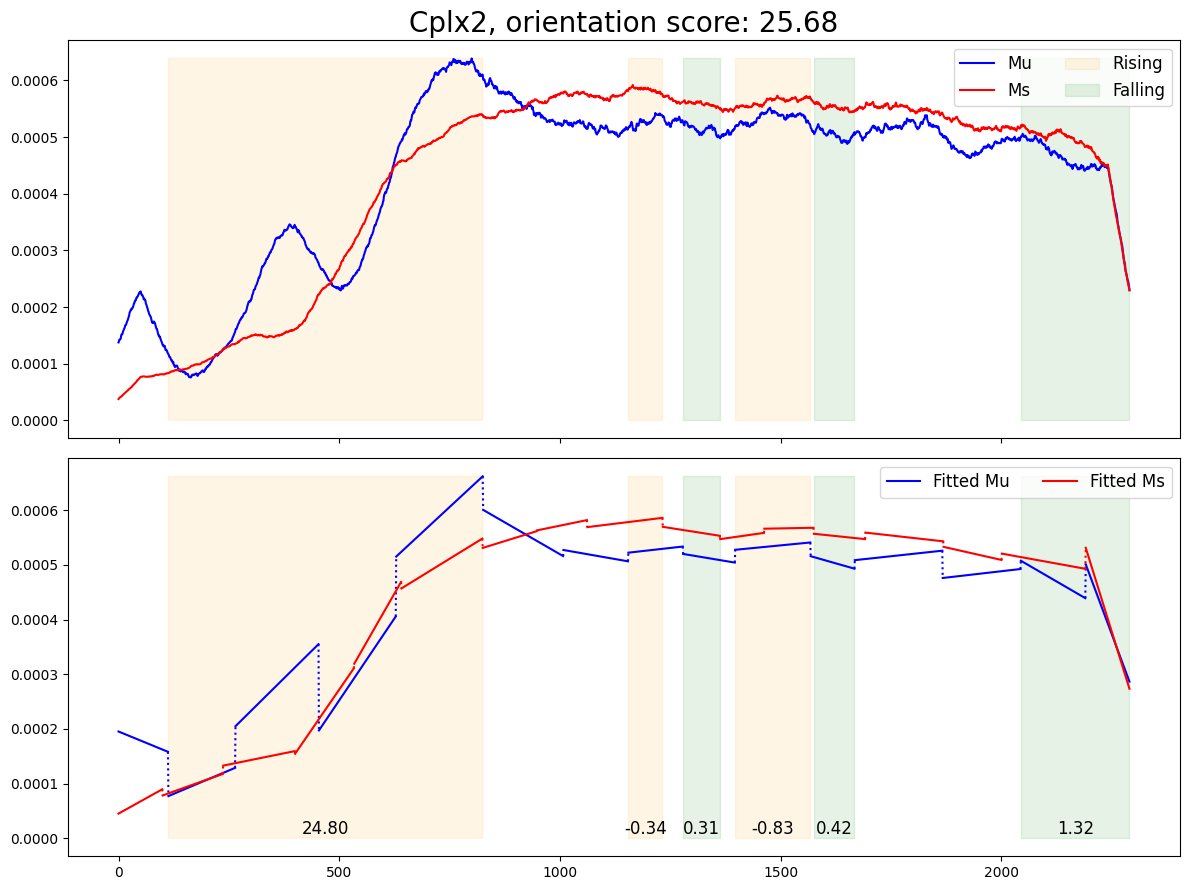

'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:23<00:00,  4.26it/s, cos_s=0.731, cos_u=0.89, mse_s=0.009, mse_u=0.006]

computing velocity graph (using 20/20 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


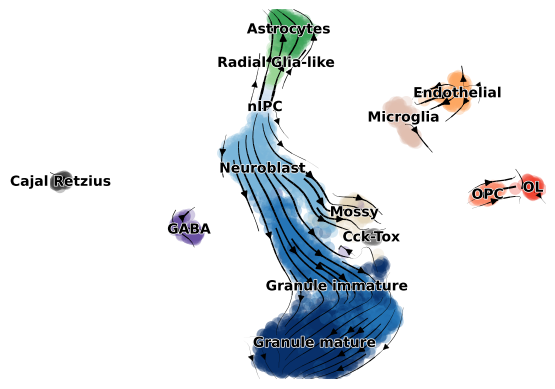

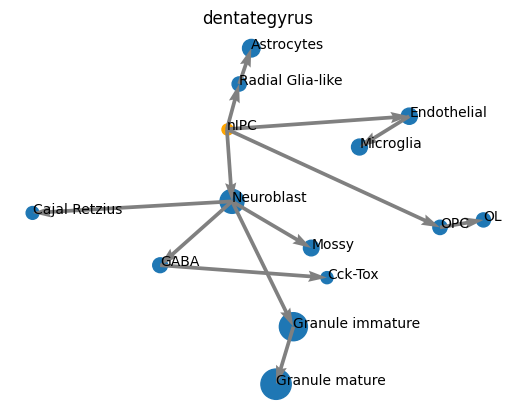

TIVelo:
 CBDir: 0.4182 ICVCoh: 0.7524 
 CBDir2: 0.4327 ICVCoh2: 0.5717 
 TransProbs: 0.4002 VeloCoh: 0.2842


In [5]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges, 
                measure_performance=measure_performance)

Generate the scatter $u$-$s$ plot for single genes.

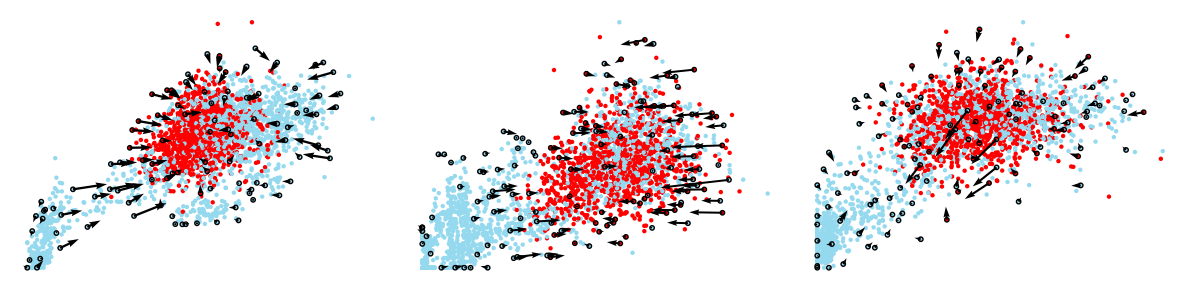

In [6]:
ncols = 3
gene_list = ["Map1b", "Cplx2", "Ak5"]
height = math.ceil(len(gene_list) / ncols) * 3
fig = plt.figure(figsize=(4 * ncols, height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list) / ncols), ncols, i + 1)
    scatter_gene(adata_, velocity_key="velocity", gene_name=gene_list[i], ax=ax, color=group_key,
                 key_cluster="Granule mature", length_scale=5)
    ax.axis('off')

fig.tight_layout()
plt.savefig(save_folder + "/{}/figs/scatter_genes.png".format(data_name))

## Run scVelo

Stochastic mode.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


C:\Users\s1155184322\anaconda3\envs\utv\lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))
C:\Users\s1155184322\anaconda3\envs\utv\lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


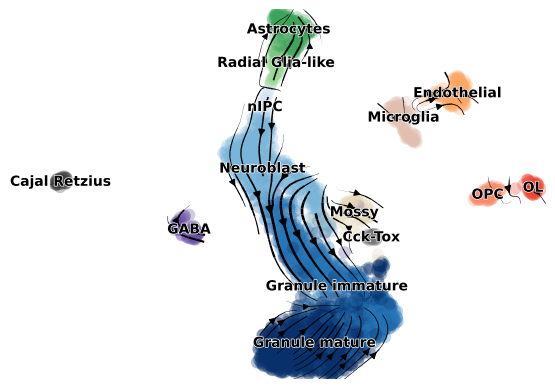

scvelo:
 CBDir: 0.1762 ICVCoh: 0.9204 
 CBDir2: 0.0371 ICVCoh2: 0.6100 
 TransProbs: 0.1308 VeloCoh: 0.0289


In [7]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

C:\Users\s1155184322\anaconda3\envs\utv\lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/557 [00:00<?, ?gene/s]

C:\Users\s1155184322\anaconda3\envs\utv\lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/2930 [00:00<?, ?cells/s]

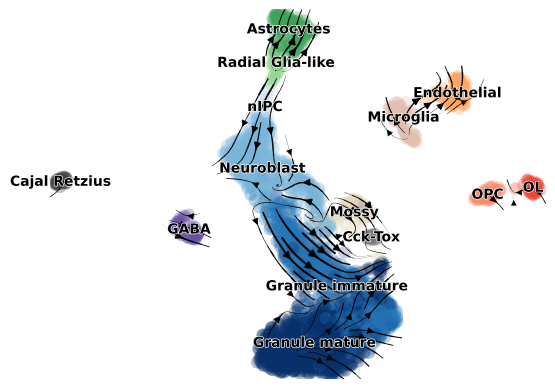

scvelo2:
 CBDir: 0.1618 ICVCoh: 0.8531 
 CBDir2: 0.1834 ICVCoh2: 0.5779 
 TransProbs: 0.2316 VeloCoh: 0.0097


In [32]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

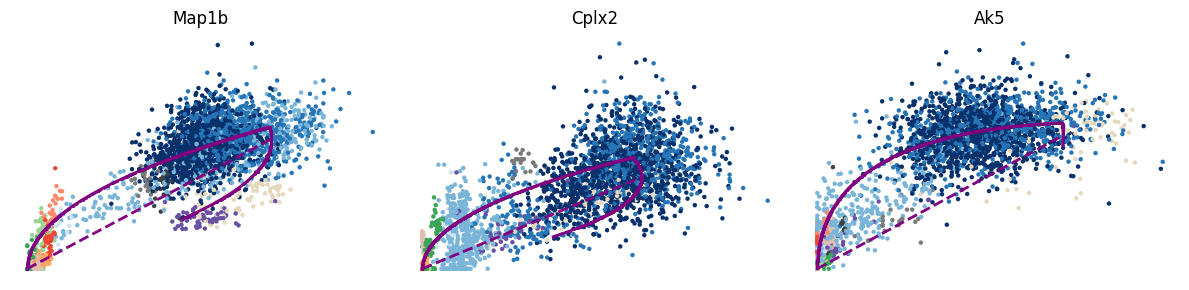

In [9]:
ncols = 3
gene_list = ["Map1b", "Cplx2", "Ak5"]
height = math.ceil(len(gene_list) / ncols) * 3
fig = plt.figure(figsize=(4 * ncols, height))
kwargs = dict(linewidth=2, add_linfit=True, frameon=False)

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list) / ncols), ncols, i + 1)
    ax = scv.pl.scatter(adata_scvelo2, basis=gene_list[i], ax=ax, show=False, add_outline='fit_diff_kinetics',
                        title="", **kwargs)
    ax.set_title(gene_list[i])
    ax.get_legend().remove()

fig.tight_layout()
plt.savefig(save_folder + "/{}/figs/scatter_genes_scvelo.png".format(data_name))

## Run veloVI.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 328/500:  66%|██████▌   | 328/500 [13:11<06:55,  2.41s/it, v_num=1, train_loss_step=-1.88e+3, train_loss_epoch=-1.88e+3]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1783.757. Signaling Trainer to stop.
computing velocity graph (using 20/20 cores)


C:\Users\s1155184322\anaconda3\envs\utv\lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


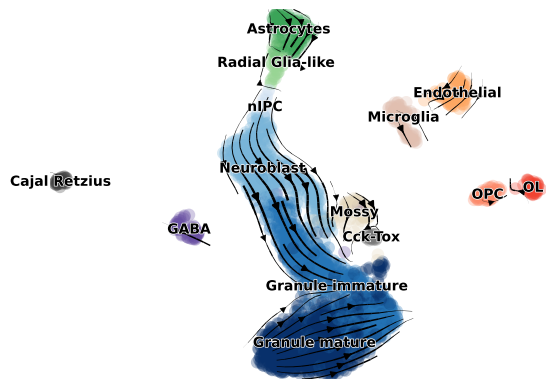

velovi:
 CBDir: 0.4736 ICVCoh: 0.8807 
 CBDir2: 0.0791 ICVCoh2: 0.6950 
 TransProbs: 0.0821 VeloCoh: 0.1599


In [10]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

Here we use "mode 2" in UniTvelo for this dataset.

------> Manully Specified Parameters <------
MAX_ITER:	10000
FIT_OPTION:	2
DENSITY:	Raw
REORDER_CELL:	Hard
AGGREGATE_T:	False
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /lustre/project/Stat/s1155184322/projects/TIVelo_code/notebooks.
Results will be stored in res folder
Extracted 1824 highly variable genes.
Computing moments for 1824 genes with n_neighbors: 30 and n_pcs: 30


/users/s1155184322/miniconda3/envs/tivelo/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)



# of velocity genes 855 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 802 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 795 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 103.581, (Spliced): 54.994, (Unspliced): 48.587: 100%|█████████▉| 9999/10000 [20:26<00:00,  8.90it/s]      

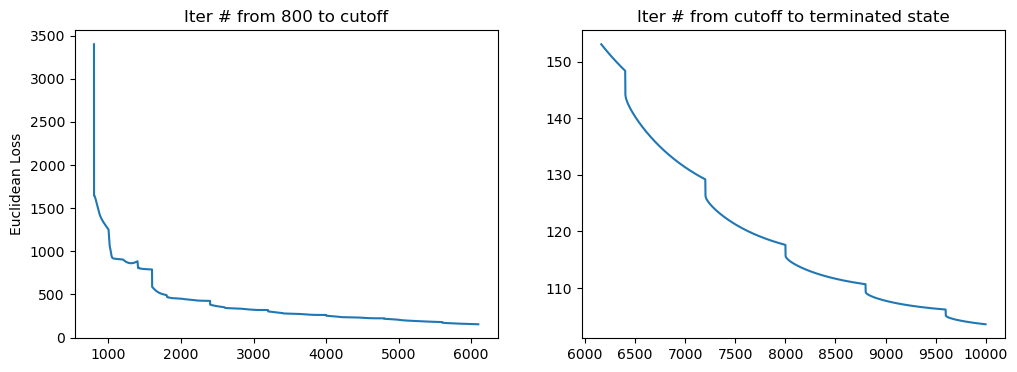

Loss (Total): 103.581, (Spliced): 54.994, (Unspliced): 48.587: 100%|█████████▉| 9999/10000 [21:01<00:00,  7.93it/s]

Total loss 103.581, vgene loss 103.581



/users/s1155184322/miniconda3/envs/tivelo/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/2930 [00:00<?, ?cells/s]

/users/s1155184322/miniconda3/envs/tivelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/users/s1155184322/miniconda3/envs/tivelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


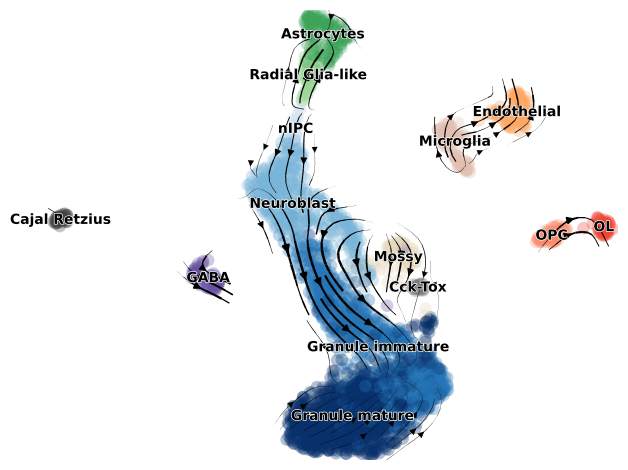

unitvelo:
 CBDir: 0.5344 ICVCoh: 0.7684 
 CBDir2: 0.2514 ICVCoh2: 0.6439 
 TransProbs: 0.1562 VeloCoh: 0.1220


In [9]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True, unitvelo_mode="2")

## Run cellDancer

We don't import celldancer package here because the installation requirement of celldancer is very strict.

To run cellDancer, it requires to first use celldancer.utilities.adata_to_df_with_embed to turn adata to dataframe as follows:

In [ ]:
# cdutil.adata_to_df_with_embed(adata, us_para=['Mu', 'Ms'], cell_type_para=group_key, embed_para=emb_key,
#                               save_path=save_folder + "/celldancer/{}/us.csv".format(data_name))

Then use celldancer.velocity for velocity genes filtered by function "compute_velocity_genes" in utils/velocity_genes.py. 

In [ ]:
# cellDancer_df = pd.read_csv(save_folder + "/celldancer/{}/us.csv".format(data_name))
# velocity_genes = compute_velocity_genes(adata, n_top_genes=2000, inplace=False)
# gene_list = list(set(adata.var_names[velocity_genes]))
# loss_df, cellDancer_df = cd.velocity(cellDancer_df, gene_list=gene_list, permutation_ratio=0.125, n_jobs=8,
#                                      save_path=save_folder + "/celldancer/{}".format(data_name))

Finally, get the result by celldancer.compute_cell_velocity and save it to "save_folder + "data_name/celldancer/data_name.csv".

In [ ]:
# cellDancer_df_path = save_folder + "/celldancer/{}/cellDancer_velocity/cellDancer_estimation.csv".format(data_name)
# cellDancer_df = pd.read_csv(cellDancer_df_path)
# cellDancer_df = cd.compute_cell_velocity(cellDancer_df=cellDancer_df, projection_neighbor_choice='gene',
#                                          expression_scale='power10', projection_neighbor_size=10, speed_up=(100, 100))
# cellDancer_df.to_csv(save_folder + "/celldancer/{}/{}.csv".format(data_name, data_name))

Note that to test cellDancer, please install the package celldancer and comment out line 747 and 748
of the file celldancer/velocity_estimation.py, and add a line after line 748: folder_name = "cellDancer_velocity".

C:\Users\s1155184322\anaconda3\envs\utv\lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/2930 [00:00<?, ?cells/s]

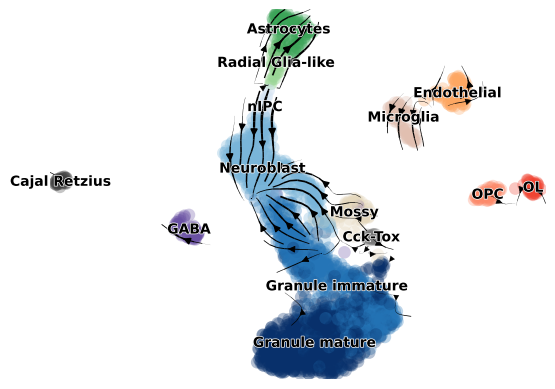

celldancer:
 CBDir: 0.4520 ICVCoh: 0.9243 
 CBDir2: 0.0684 ICVCoh2: 0.5402 
 TransProbs: 0.1018 VeloCoh: -0.3813


In [12]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)

## Run DeepVelo

We don't directly run DeepVelo here since the environment required by DeepVelo may conflict that of TIVelo. We recommend running DeepVelo in an independent environment as follows:

In [ ]:
# import numpy as np
# import scvelo as scv
# import scanpy as sc
# import torch
# from deepvelo.utils import velocity, update_dict
# from deepvelo.utils.preprocess import autoset_coeff_s
# from deepvelo.utils.plot import statplot, compare_plot
# from deepvelo import train, Constants

# adata = sc.read(data_path)

# configs = {
#     "name": "DeepVelo", 
#     "loss": {"args": {"coeff_s": autoset_coeff_s(adata)}},
#     "trainer": {"verbosity": 1}, 
# }
# configs = update_dict(Constants.default_configs, configs)

# velocity(adata, mask_zero=False)
# trainer = train(adata, configs)

In [3]:
adata_deepvelo = sc.read("/users/s1155184322/projects/tutorial/DeepVelo/results/dentategyrus_deepvelo_default.h5ad")
velocity_key = "velocity"

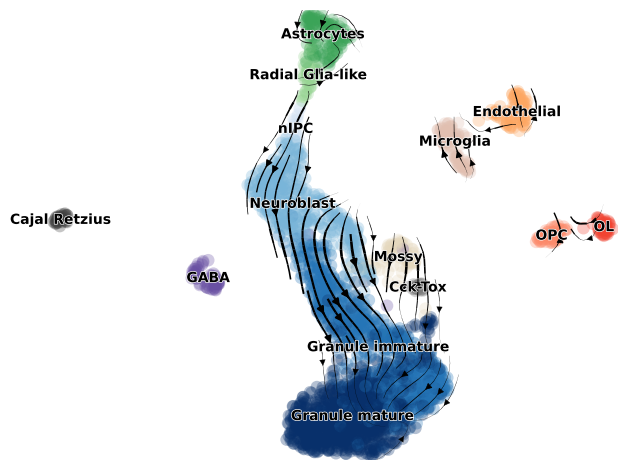

In [7]:
ax = scv.pl.velocity_embedding_stream(adata_deepvelo, vkey=velocity_key, color=group_key, title="", show=False)
plt.tight_layout()

In [12]:
from tivelo.utils.metrics import inner_cluster_coh, cross_boundary_correctness, cross_boundary_scvelo_probs, \
    cross_boundary_correctness2, inner_cluster_coh2, velo_coh
    
_, cbdir = cross_boundary_correctness(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                  cluster_edges=cluster_edges, x_emb=emb_key)
_, cbdir2 = cross_boundary_correctness2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                    cluster_edges=cluster_edges)
_, trans_probs = cross_boundary_scvelo_probs(adata_deepvelo, cluster_key=group_key, cluster_edges=cluster_edges,
                                                         trans_g_key="{}_graph".format(velocity_key))
_, icvcoh = inner_cluster_coh(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key)
_, icvcoh2 = inner_cluster_coh2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key, x_emb=emb_key)
velocoh = velo_coh(adata_deepvelo, velocity_key=velocity_key, trans_g_key="{}_graph".format(velocity_key))

print("DeepVelo:\n", "CBDir:", "%.4f" % cbdir, "ICVCoh:", "%.4f" % icvcoh, "\n",
      "CBDir2:", "%.4f" % cbdir2, "ICVCoh2:", "%.4f" % icvcoh2, "\n",
      "TransProbs:", "%.4f" % trans_probs, "VeloCoh:", "%.4f" % velocoh)

DeepVelo:
 CBDir: 0.3647 ICVCoh: 0.9571 
 CBDir2: 0.1463 ICVCoh2: 0.7631 
 TransProbs: 0.1955 VeloCoh: 0.3357
